In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

In [4]:
file = "Crime_Data_from_2020_to_Present.csv"
crime_df = pd.read_csv(file)
crime_df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


###**Data Inspection**



In [6]:
print("Shape of dataset:", crime_df.shape)
print("\nColumns:", crime_df.columns)
print("\nData Types:\n", crime_df.dtypes)

Shape of dataset: (982638, 28)

Columns: Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

Data Types:
 DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1      

###**Data Cleaning**

In [7]:
# Convert date columns to datetime
crime_df["DATE OCC"] = pd.to_datetime(crime_df["DATE OCC"], errors="coerce")
crime_df["Date Rptd"] = pd.to_datetime(crime_df["Date Rptd"], errors="coerce")

/tmp/ipython-input-3496378545.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime_df["DATE OCC"] = pd.to_datetime(crime_df["DATE OCC"], errors="coerce")
/tmp/ipython-input-3496378545.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime_df["Date Rptd"] = pd.to_datetime(crime_df["Date Rptd"], errors="coerce")


In [8]:
# Remove duplicates
crime_df = crime_df.drop_duplicates()

In [10]:
# Handle missing values (fill categorical with 'Unknown', numeric with median)
for col in crime_df.select_dtypes(include=['object']).columns:
  crime_df[col] = crime_df[col].fillna("Unknown")
for col in crime_df.select_dtypes(include=['float64', 'int64']).columns:
  crime_df[col] = crime_df[col].fillna(crime_df[col].median())

In [24]:
crime_df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,DayOfWeek,Period
0,190326475,2020-03-01,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,510.0,998.0,998.0,998.0,1900 S LONGWOOD AV,Unknown,34.0375,-118.3506,Sunday,Before Lockdown
1,200106753,2020-02-09,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,330.0,998.0,998.0,998.0,1000 S FLOWER ST,Unknown,34.0444,-118.2628,Saturday,Before Lockdown
2,200320258,2020-11-11,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,480.0,998.0,998.0,998.0,1400 W 37TH ST,Unknown,34.0210,-118.3002,Wednesday,After Lockdown
3,200907217,2023-05-10,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,343.0,998.0,998.0,998.0,14000 RIVERSIDE DR,Unknown,34.1576,-118.4387,Tuesday,Before Lockdown
4,220614831,2022-08-18,2020-08-17,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,354.0,998.0,998.0,998.0,1900 TRANSIENT,Unknown,34.0944,-118.3277,Monday,After Lockdown


In [51]:
sns.set_theme(style="whitegrid")   # switch to "darkgrid" if presenting
custom_palette = ["#4E79A7", "#F28E2B", "#E15759", "#76B7B2", "#59A14F", "#EDC948"]

###**Exploratory Data Analysis (EDA)**

**Overall Crime Trends**

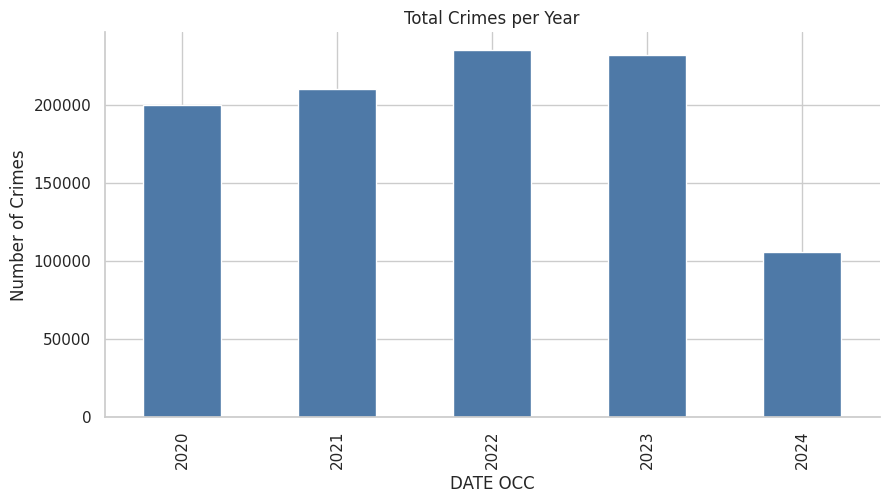

In [52]:
plt.figure(figsize=(10,5))
crime_yearly.plot(kind='bar', color=custom_palette[0])
plt.title("Total Crimes per Year")
plt.ylabel("Number of Crimes")
sns.despine()
plt.show()

**Seasonal Patterns**

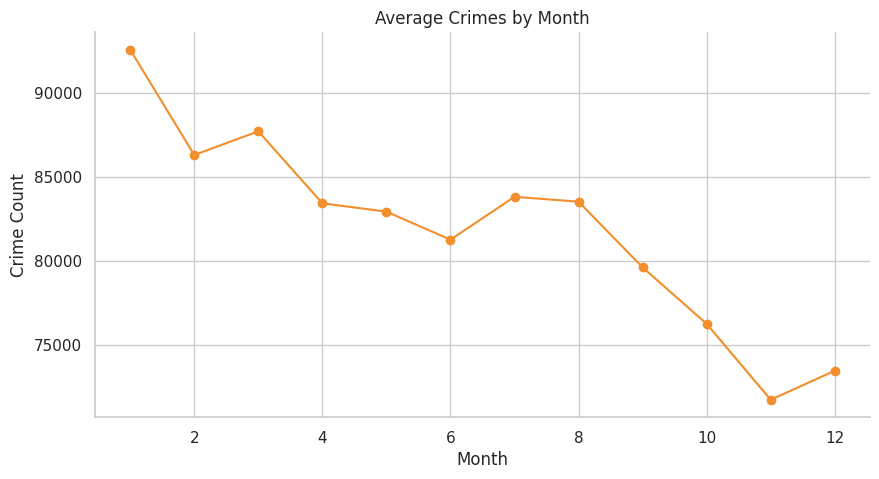

In [53]:
plt.figure(figsize=(10,5))
crime_monthly.plot(kind='line', marker='o', color=custom_palette[1])
plt.title("Average Crimes by Month")
plt.xlabel("Month")
plt.ylabel("Crime Count")
sns.despine()
plt.show()

**Most Common Crime Type**

/tmp/ipython-input-1337050389.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=common_crimes.index, x=common_crimes.values, palette="viridis")


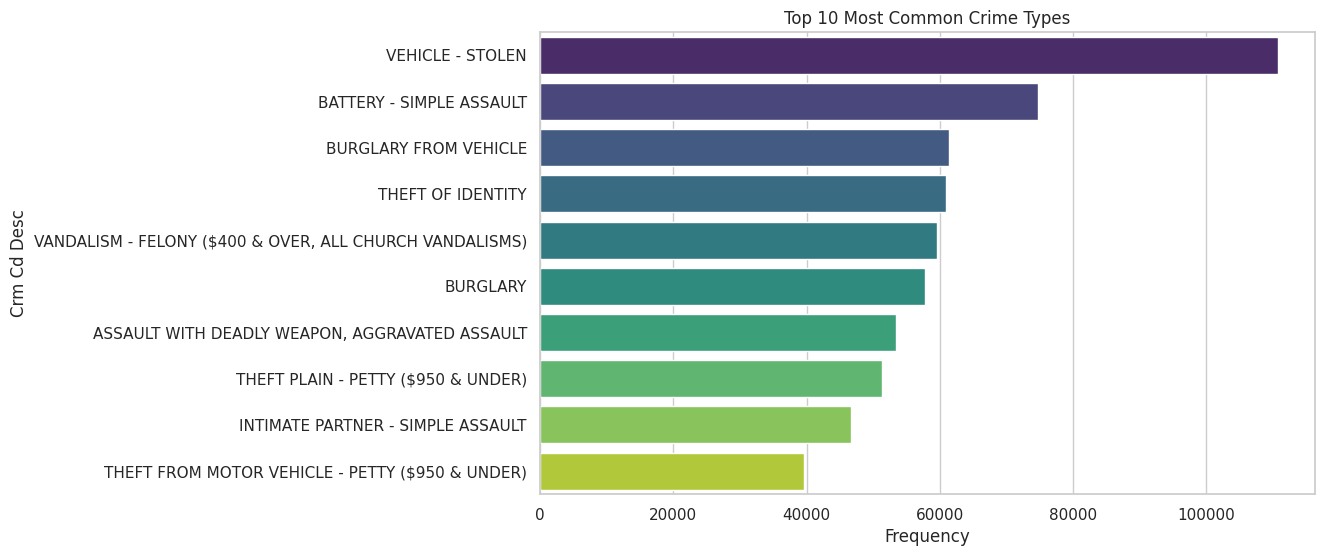

In [54]:
common_crimes = crime_df["Crm Cd Desc"].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(y=common_crimes.index, x=common_crimes.values, palette="viridis")
plt.title("Top 10 Most Common Crime Types")
plt.xlabel("Frequency")
plt.show()

**Regional Differences**

/tmp/ipython-input-56751404.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=region_crime.index, x=region_crime.values, palette=custom_palette)
/tmp/ipython-input-56751404.py:2: UserWarning: 
The palette list has fewer values (6) than needed (21) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(y=region_crime.index, x=region_crime.values, palette=custom_palette)


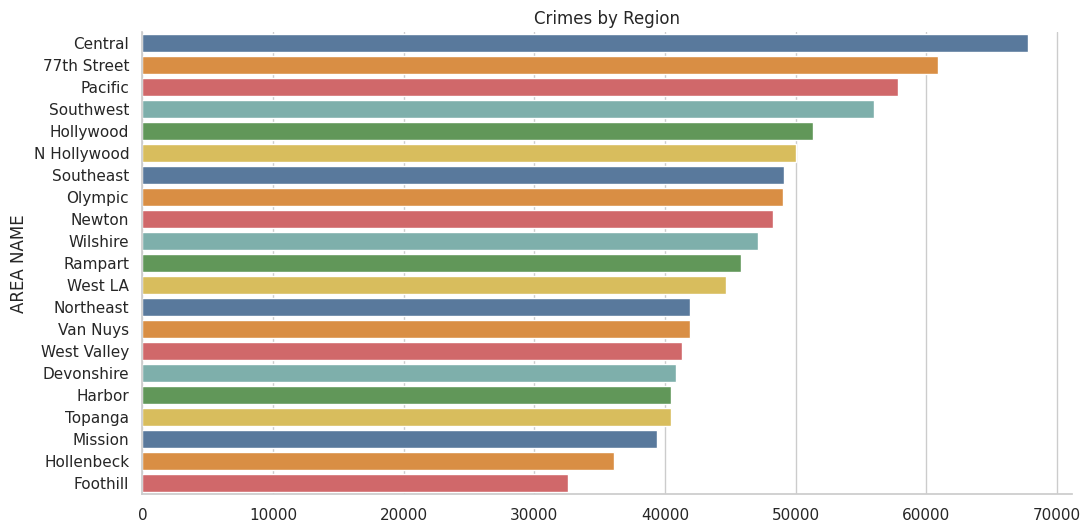

In [55]:

plt.figure(figsize=(12,6))
sns.barplot(y=region_crime.index, x=region_crime.values, palette=custom_palette)
plt.title("Crimes by Region")
sns.despine()
plt.show()

**Day of the Week Analysis**

/tmp/ipython-input-2005210314.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, palette=custom_palette)
/tmp/ipython-input-2005210314.py:2: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=day_counts.index, y=day_counts.values, palette=custom_palette)


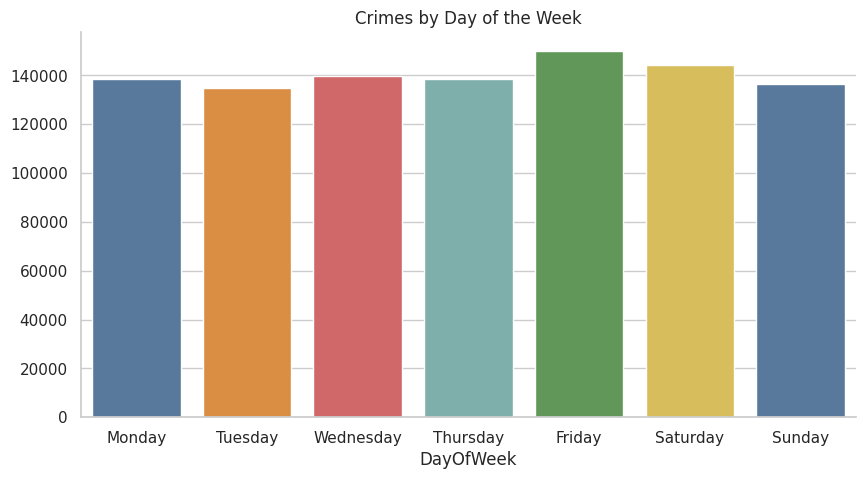

In [56]:
plt.figure(figsize=(10,5))
sns.barplot(x=day_counts.index, y=day_counts.values, palette=custom_palette)
plt.title("Crimes by Day of the Week")
sns.despine()
plt.show()

**Outliers and Anomalies**

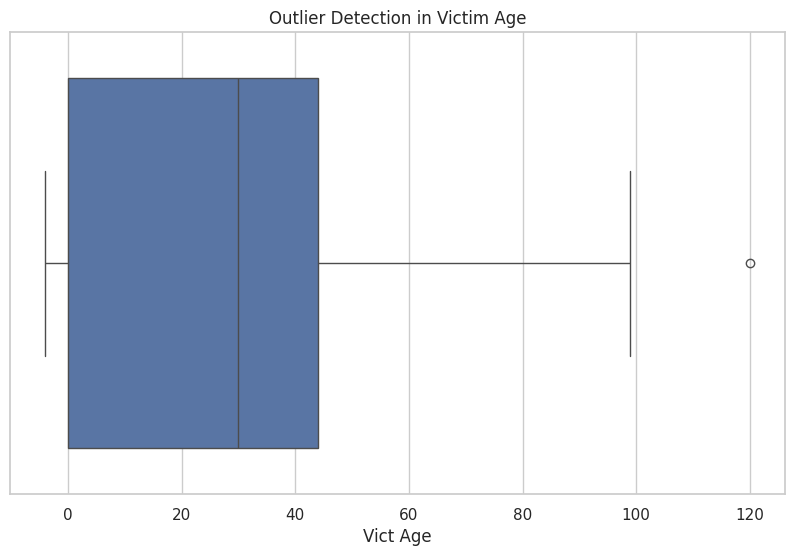


Anomalous Months (Z-score > 3):
Empty DataFrame
Columns: [CrimeCount, zscore]
Index: []


In [57]:
plt.figure(figsize=(10,6))
sns.boxplot(x=crime_df['Vict Age'])
plt.title("Outlier Detection in Victim Age")
plt.show()

# Z-score method for anomalies in monthly crime counts
crime_monthly_ts['zscore'] = (crime_monthly_ts['CrimeCount'] - crime_monthly_ts['CrimeCount'].mean()) / crime_monthly_ts['CrimeCount'].std()
print("\nAnomalous Months (Z-score > 3):")
print(crime_monthly_ts[crime_monthly_ts['zscore'] > 3])

**Demographic Factors**

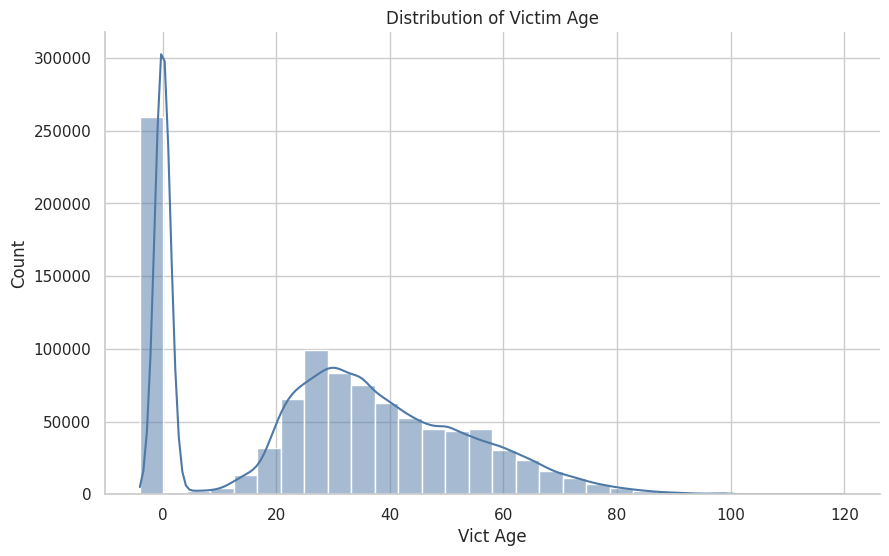

In [58]:
# Victim Age Distribution
plt.figure(figsize=(10,6))
sns.histplot(crime_df['Vict Age'], bins=30, kde=True, color=custom_palette[0])
plt.title("Distribution of Victim Age")
sns.despine()
plt.show()

/tmp/ipython-input-855709067.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Vict Sex', data=crime_df, palette=custom_palette)


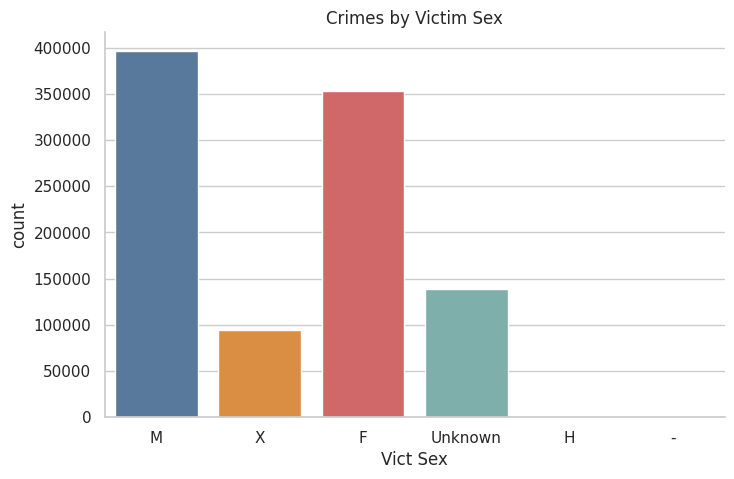

In [39]:
# Crimes by Victim Sex
plt.figure(figsize=(8,5))
sns.countplot(x='Vict Sex', data=crime_df, palette=custom_palette)
plt.title("Crimes by Victim Sex")
sns.despine()
plt.show()

/tmp/ipython-input-2458945969.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=victim_descent.index, y=victim_descent.values, palette=custom_palette)
/tmp/ipython-input-2458945969.py:4: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=victim_descent.index, y=victim_descent.values, palette=custom_palette)


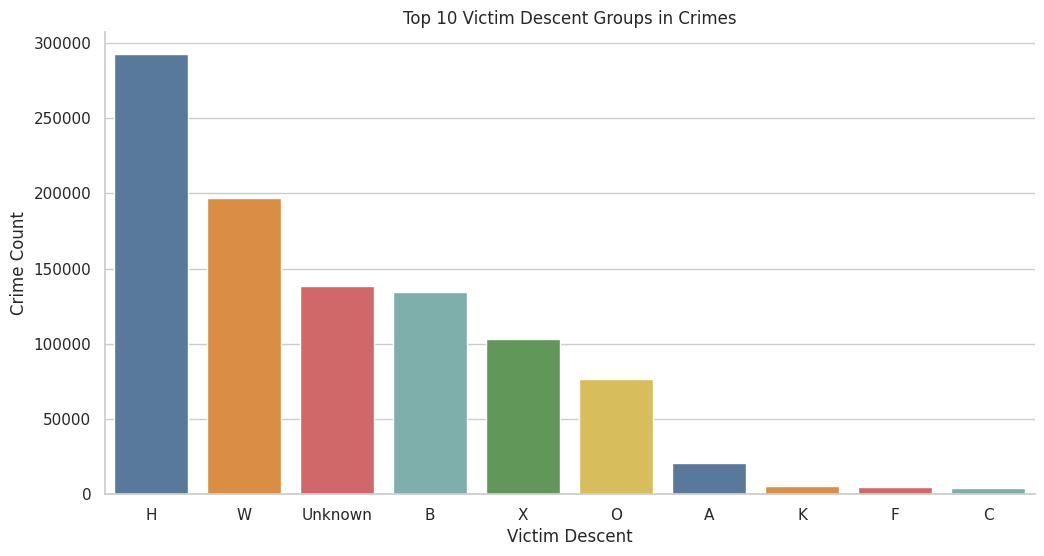

In [40]:
# Top 10 Victim Descent Groups
plt.figure(figsize=(12,6))
victim_descent = crime_df['Vict Descent'].value_counts().head(10)
sns.barplot(x=victim_descent.index, y=victim_descent.values, palette=custom_palette)
plt.title("Top 10 Victim Descent Groups in Crimes")
plt.xlabel("Victim Descent")
plt.ylabel("Crime Count")
sns.despine()
plt.show()

**Crime Frequency Heatmap (Day vs Hour)**

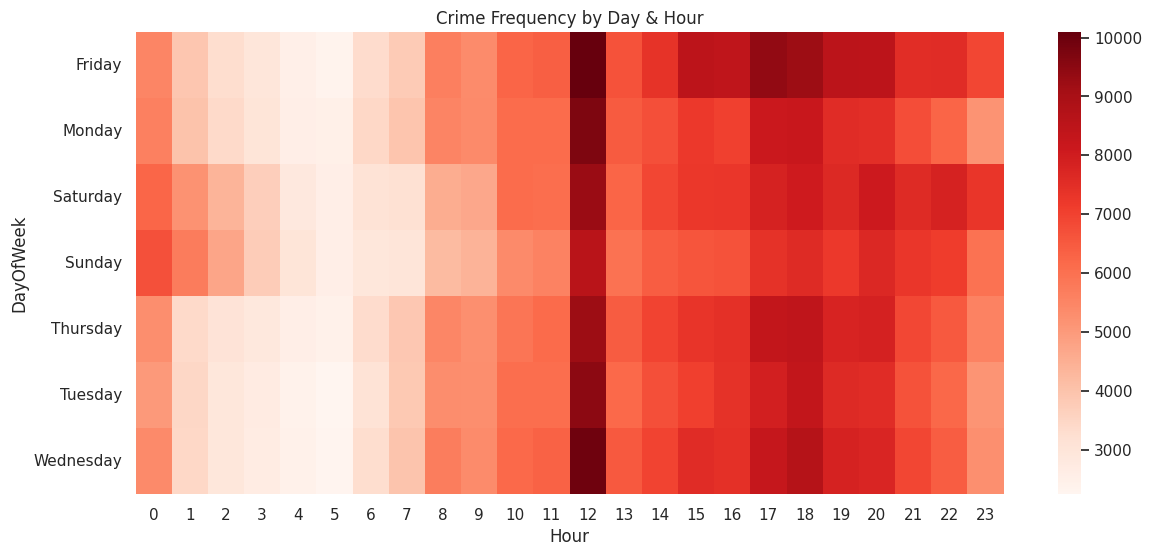

In [33]:
crime_df['Hour'] = crime_df['TIME OCC'] // 100
heatmap_data = crime_df.pivot_table(index='DayOfWeek', columns='Hour', values='DR_NO', aggfunc='count').fillna(0)

plt.figure(figsize=(14,6))
sns.heatmap(heatmap_data, cmap="Reds")  # intensity palette
plt.title("Crime Frequency by Day & Hour")
plt.show()


###**Predicting Future Crime Trends**

**ARIMA Forecasting**

/tmp/ipython-input-1647451475.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  crime_monthly_ts = crime_time.resample('M').sum()


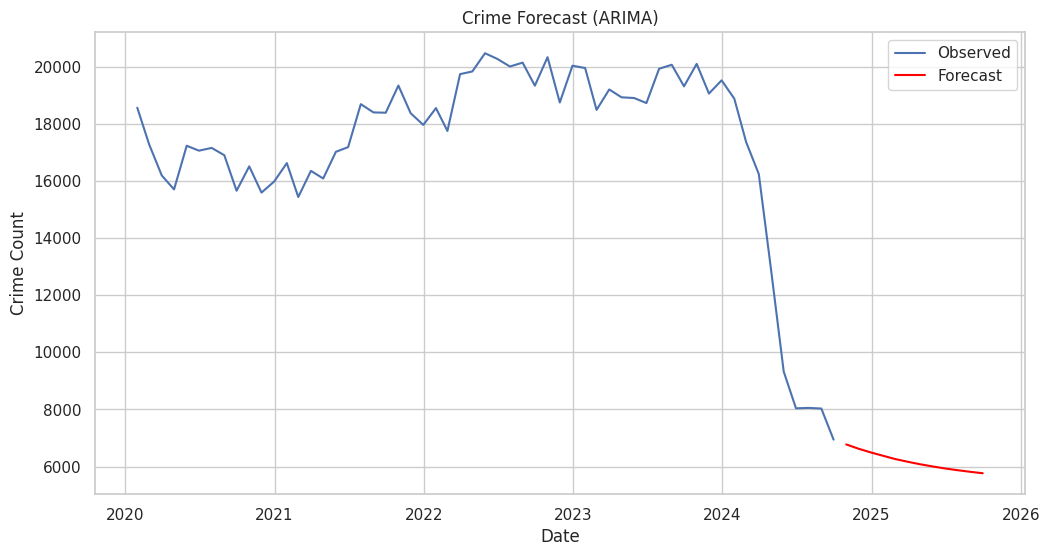

In [41]:
crime_time = crime_df.groupby("DATE OCC").size().reset_index(name="CrimeCount")
crime_time = crime_time.set_index("DATE OCC")

# Resample by month for smoother time series
crime_monthly_ts = crime_time.resample('M').sum()

# Fit ARIMA model
model = ARIMA(crime_monthly_ts, order=(1,1,1))
model_fit = model.fit()

# Forecast next 12 months
forecast = model_fit.forecast(steps=12)

plt.figure(figsize=(12,6))
plt.plot(crime_monthly_ts, label="Observed")
plt.plot(forecast.index, forecast, label="Forecast", color="red")
plt.title("Crime Forecast (ARIMA)")
plt.xlabel("Date")
plt.ylabel("Crime Count")
plt.legend()
plt.show()